#### Outliers Detection & Removal approaches

- Identifying outliesrs with visualization
- Z-score method
- Interquartile Range Method (IQR) method
- Compare Skewness

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [2]:
df = pd.read_csv("data/cleaned.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### 1. Identifying Outliers with visualization

In [7]:
numeric_features = [column for column in df.columns if df[column].dtype != 'O']
num_df = df[numeric_features]
num_df.head()

,math score,reading score,writing score,total score,average
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


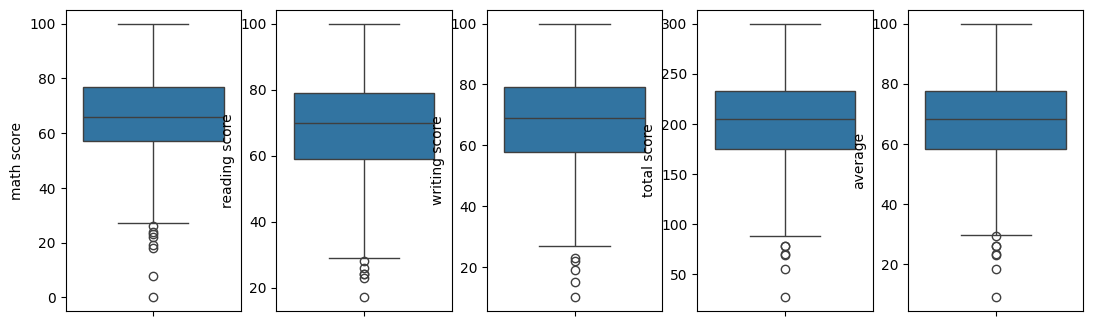

In [8]:
plt.figure(figsize=(24,18))
for i, col in enumerate(numeric_features):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

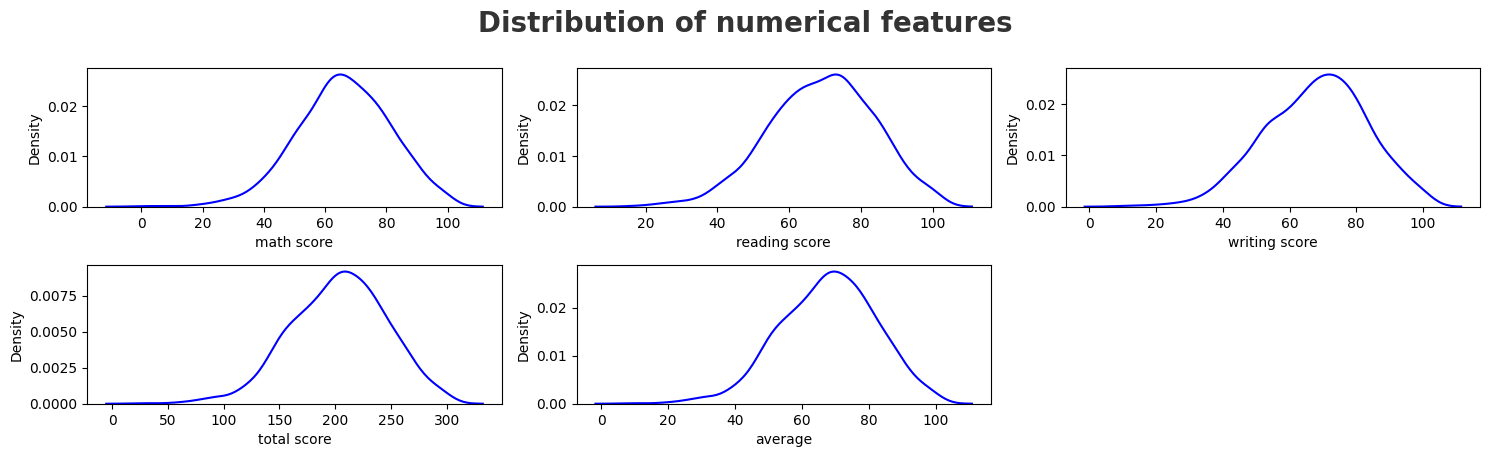

In [12]:
plt.figure(figsize=(15,10))
plt.suptitle("Distribution of numerical features", fontsize=20, fontweight="bold", alpha=0.8, y=1)
for i, column in enumerate(numeric_features):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[column], color="blue")
    plt.xlabel(column)
    plt.tight_layout()

- The outliers are there, as there are many data points which lie far away from maximum points

In [14]:
categorical_features = [column for column in df.columns if df[column].dtype == "O"]
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [25]:
def count_outliers(data, col):
    q1 = data[col].quantile(0.25, interpolation="nearest")
    q2 = data[col].quantile(0.5, interpolation="nearest")
    q3 = data[col].quantile(0.75, interpolation="nearest")
    q4 = data[col].quantile(1, interpolation="nearest")
    IQR= q3-q1
    global LLP
    global ULP
    LLP = q1 - 1.5 * IQR
    ULP = q3 + 1.5 * IQR
    if data[col].min() > LLP and data[col].max() < ULP:
        print(f"There are no outliers in {col}")
    else:
        print(f"There are outliers present in {col}")
        outliers_column.append(col)
        x = data[data[col]<LLP][col].size
        y = data[data[col]>ULP][col].size
        print(f"outliers count is {x+y}")        

In [26]:
global outliers_column
outliers_column = []
for col in numeric_features:
    count_outliers(df, col)


There are outliers present in math score
outliers count is 8
There are outliers present in reading score
outliers count is 6
There are outliers present in writing score
outliers count is 5
There are outliers present in total score
outliers count is 6
There are outliers present in average
outliers count is 7


np.int64(57)

#### Z -score method
Z-score
- The number of standard deviations away from the mean that particular observation is
- A negative Z-score means an observation is below the mean
- while a positive Z-score means it above the mean
- The further away from 0 the Z-score is, the further away from the mean your observation is.

In [27]:
# function to detect the outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquartile_range = quartile3- quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    lower_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, upper_limit
    

In [28]:
# function to remove outliers
def replace_with_thersholds(dataframe, numeric_columns):
    for column in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, column)
        dataframe.loc[dataframe[column]<low_limit, column ] = low_limit
        dataframe.loc[datafram[column] > up_limit, column] = up_limit
        

In [ ]:
replace_with_thersholds(num_df, num_df.columns)

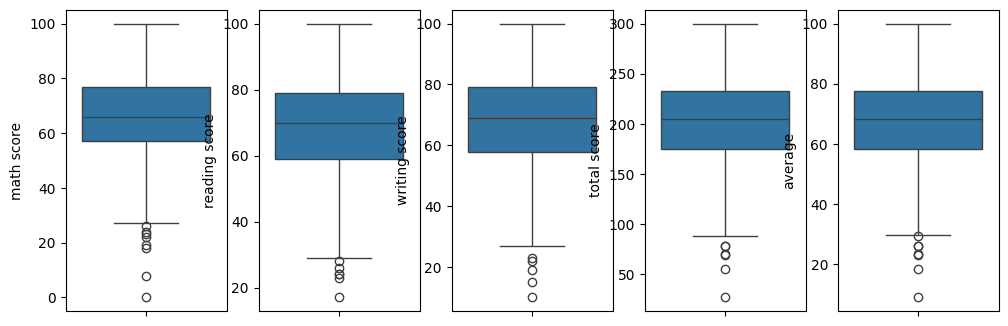

In [29]:
plt.figure(figsize=(22,18))
for i,col in enumerate(numeric_features):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])


- As we can see that outliers are not removed properly

#### Interquartile Range Method (IQR) method

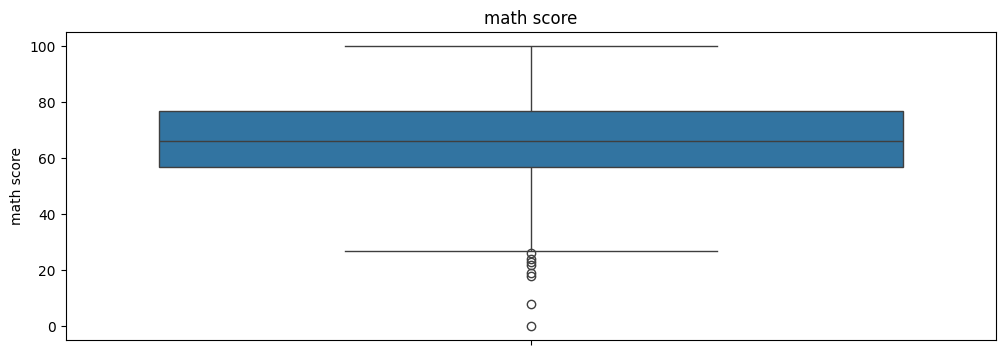

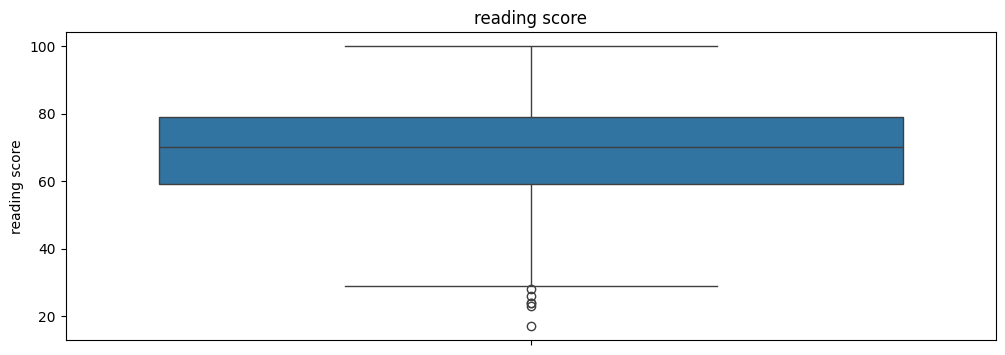

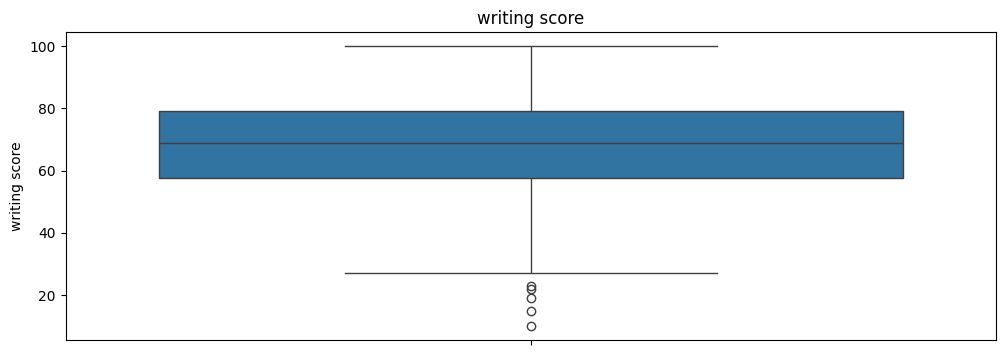

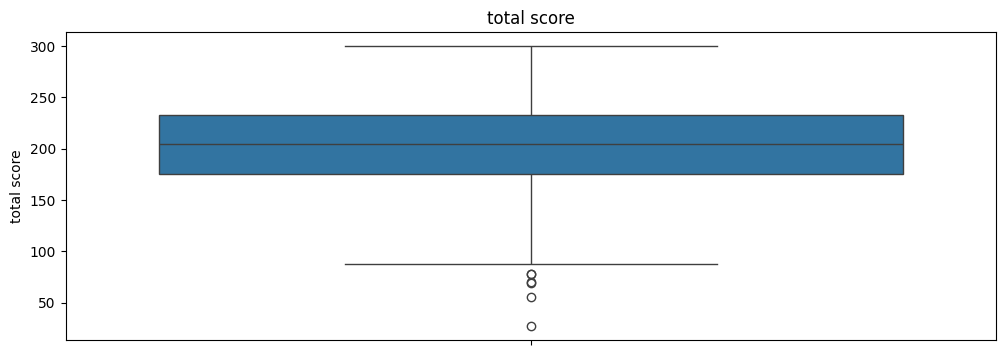

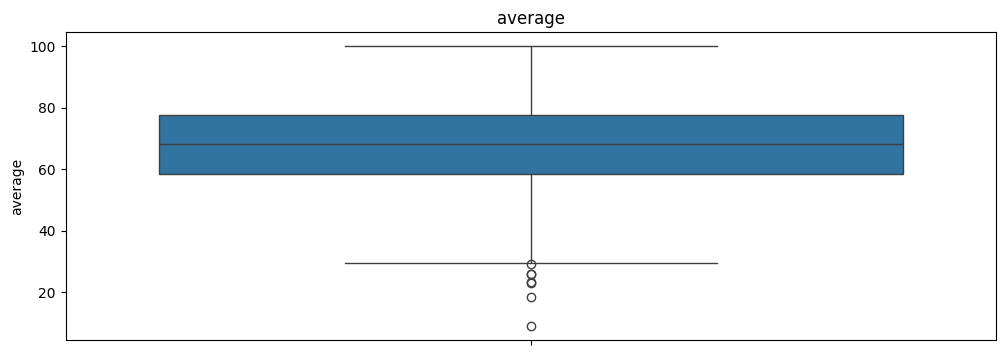

In [32]:
for col in numeric_features:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col]) 
    plt.title(col)

In [41]:
df1 = df.copy()
def remove_outliers_IQR(col):
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25", percentile25)
    print("percentile75", percentile75)
    iqr = percentile75-percentile25
    upper_limit = percentile75 + 1.5*iqr
    lower_limit = percentile25 - 1.5*iqr
    print("Upper limit", upper_limit)
    print("Lower limit", lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit, lower_limit, df1[col]))
    return df[(df[col] > upper_limit) | ( df[col]<lower_limit)][col]

In [42]:
remove_outliers_IQR('math score')

percentile25 57.0
percentile75 77.0
Upper limit 107.0
Lower limit 27.0


17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math score, dtype: int64

In [55]:
def create_comparison_plot(df,df1,column):
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.histplot(df[column], kde=True)

    plt.subplot(2,2,2)
    sns.boxplot(df[column])  # orient="h" for horizontal boxplot

    plt.subplot(2,2,3)
    sns.histplot(df1[column], kde=True)

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()
    

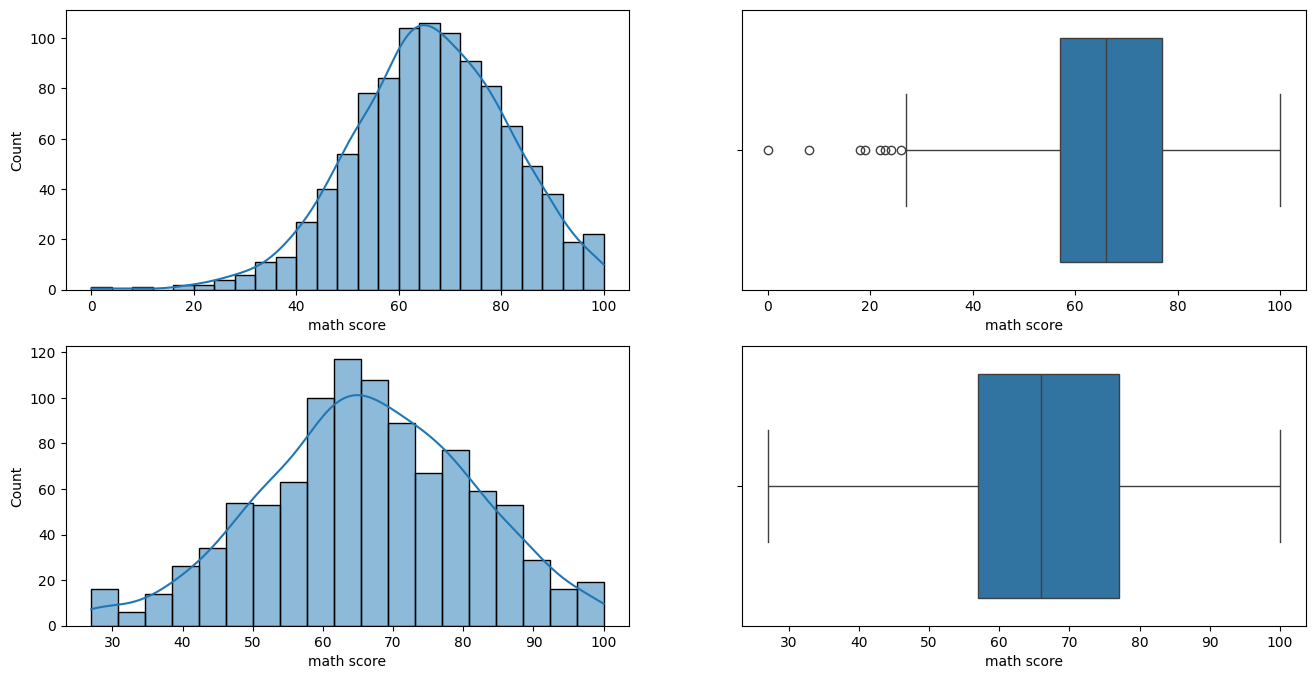

In [52]:
create_comparison_plot(df,df1, "math score")

In [53]:
remove_outliers_IQR("reading score")

percentile25 59.0
percentile75 79.0
Upper limit 109.0
Lower limit 29.0


59     17
76     26
211    28
327    23
596    24
980    24
Name: reading score, dtype: int64

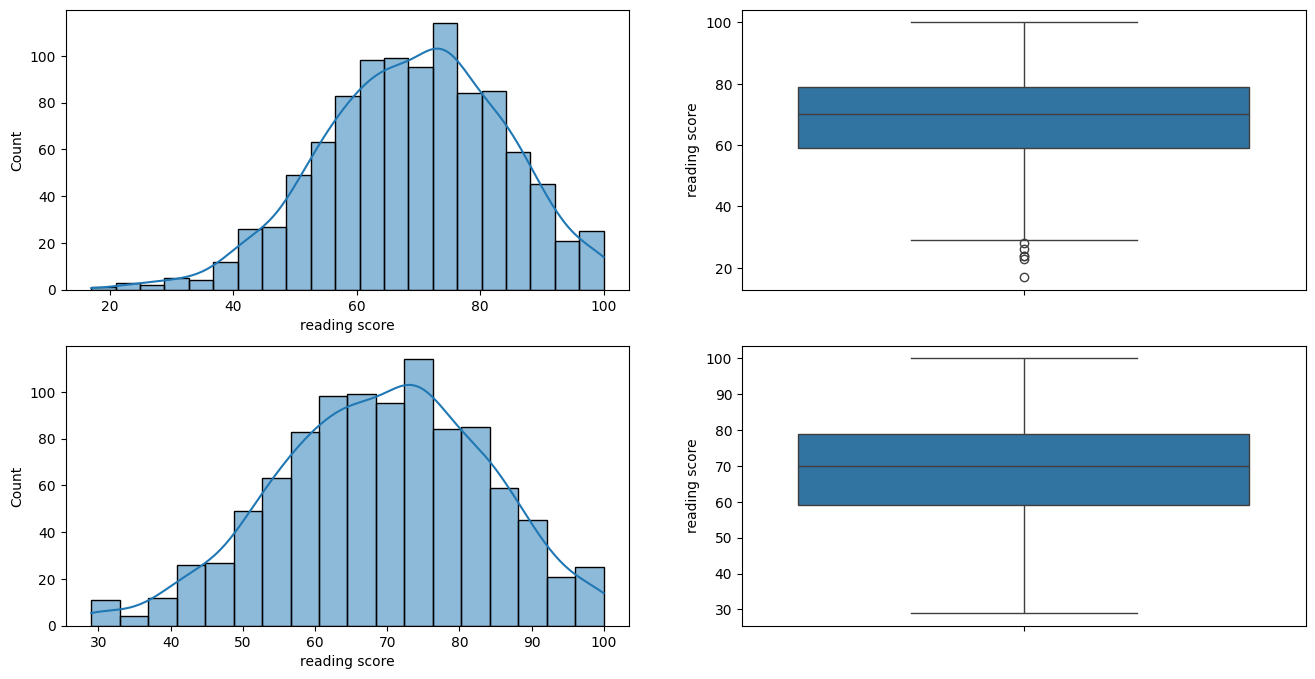

In [56]:
create_comparison_plot(df,df1,"reading score")

In [57]:
remove_outliers_IQR("writing score")

percentile25 57.75
percentile75 79.0
Upper limit 110.875
Lower limit 25.875


59     10
76     22
327    19
596    15
980    23
Name: writing score, dtype: int64

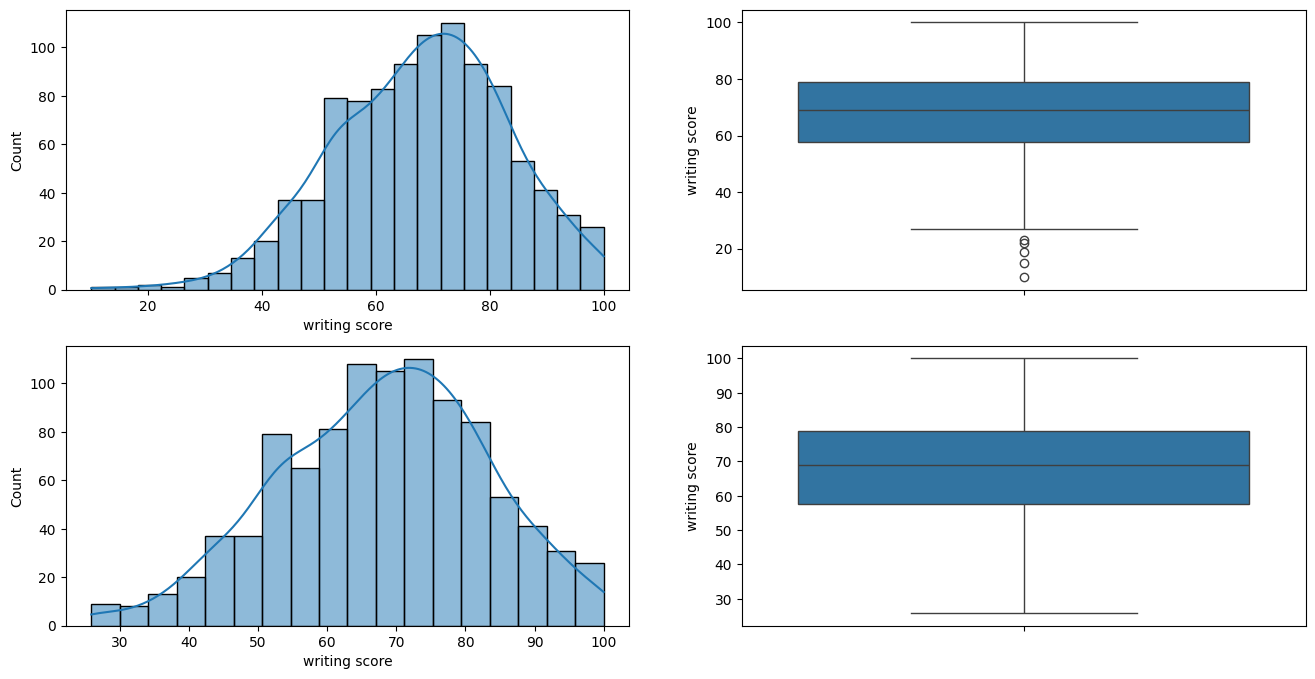

In [58]:
create_comparison_plot(df,df1, "writing score")

In [59]:
remove_outliers_IQR("total score")

percentile25 175.0
percentile75 233.0
Upper limit 320.0
Lower limit 88.0


17     78
59     27
76     78
327    70
596    69
980    55
Name: total score, dtype: int64

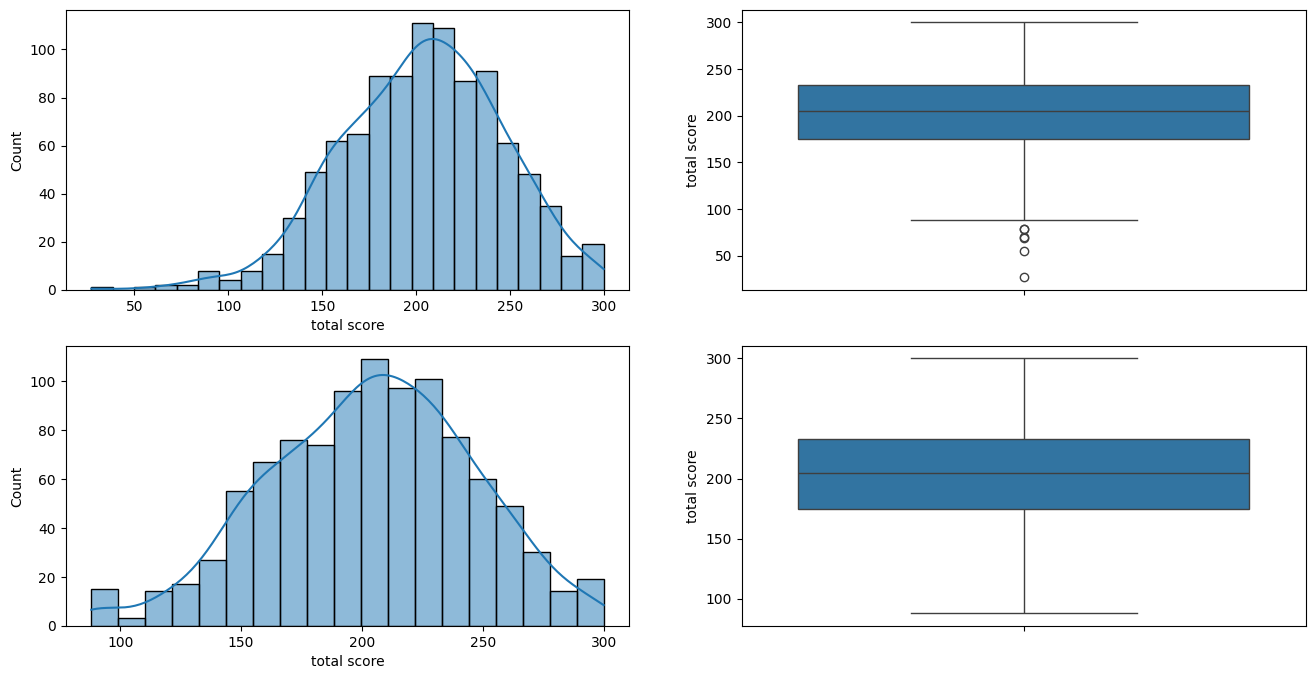

In [60]:
create_comparison_plot(df,df1, "total score")

In [61]:
remove_outliers_IQR("average")

percentile25 58.333333333333336
percentile75 77.66666666666667
Upper limit 106.66666666666667
Lower limit 29.333333333333332


17     26.000000
59      9.000000
76     26.000000
327    23.333333
596    23.000000
601    29.333333
980    18.333333
Name: average, dtype: float64

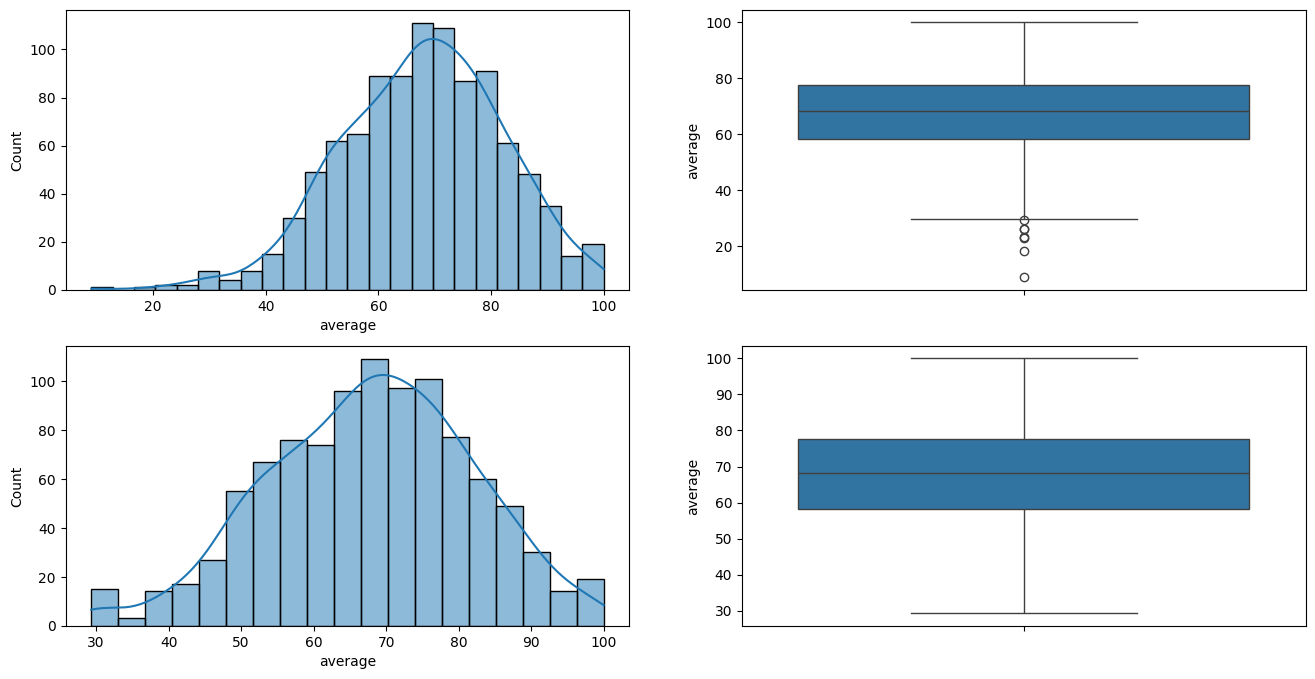

In [62]:
create_comparison_plot(df, df1, "average")

#### Compare Skewness

In [63]:
df.skew(numeric_only=True)

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
total score     -0.299057
average         -0.299057
dtype: float64

In [64]:
df1.skew(numeric_only=True)

math score      -0.148833
reading score   -0.209790
writing score   -0.223701
total score     -0.210374
average         -0.210374
dtype: float64

Skewness is reduced after we have removed outliers using IQR Method

In [67]:
df1.to_csv("data/outlier_removed.csv", index=False)